
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

%reload_ext autoreload
%autoreload 2

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

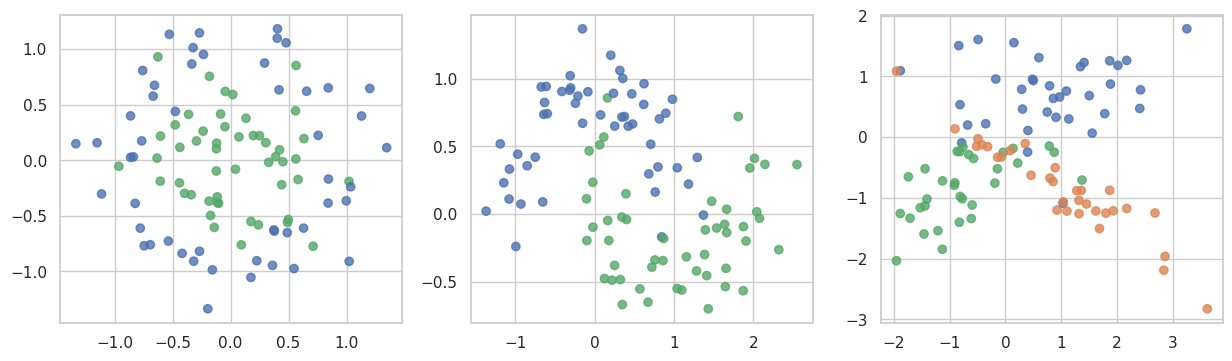

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

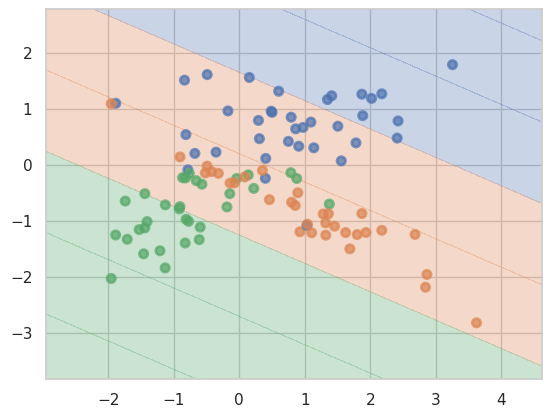

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

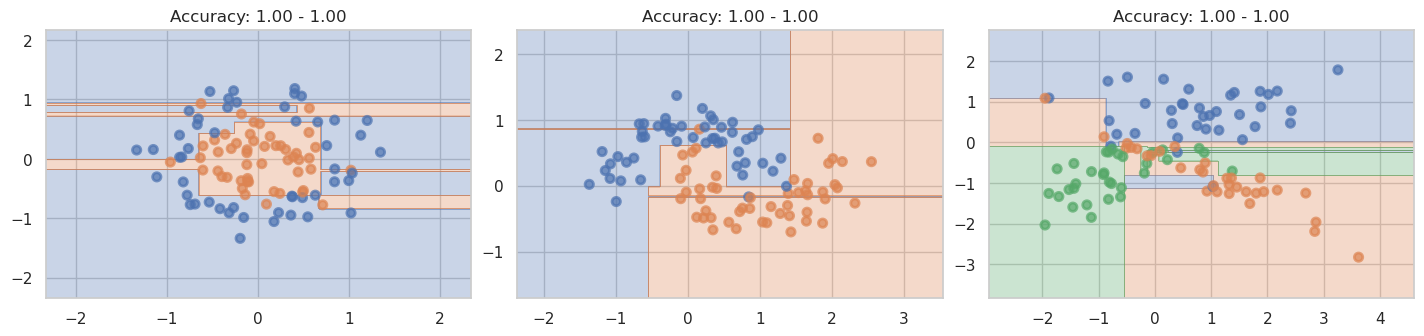

In [7]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 4))
for idx, (X, y) in enumerate(datasets, start=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf  =  DecisionTreeClassifier(random_state=42)
    clf.fit(X, y)
    
    acc_tr = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
    acc_tst = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    
    plt.subplot(1, 3, idx)
    plot_surface(clf, X, y)
    plt.title(f"Accuracy: {acc_tr:.2f} - {acc_tst:.2f}")

__Ответ:__ 

Действителньо деревья переобучились, что заметно по попытке построить разделяющую поверхность для выборосов. Об этом же можно судить по метрикам = 1

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

================================== DATASET_1 ===================================
Number of estimators:  6
Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 2}
BEST Accuracy:  Train:  0.95   -   Test:  0.70
================================== DATASET_2 ===================================
Number of estimators:  6
Best parameters found:  {'max_depth': 2, 'min_samples_leaf': 2}
BEST Accuracy:  Train:  0.96   -   Test:  0.75
================================== DATASET_3 ===================================
Number of estimators:  6
Best parameters found:  {'max_depth': 2, 'min_samples_leaf': 5}
BEST Accuracy:  Train:  0.86   -   Test:  0.90


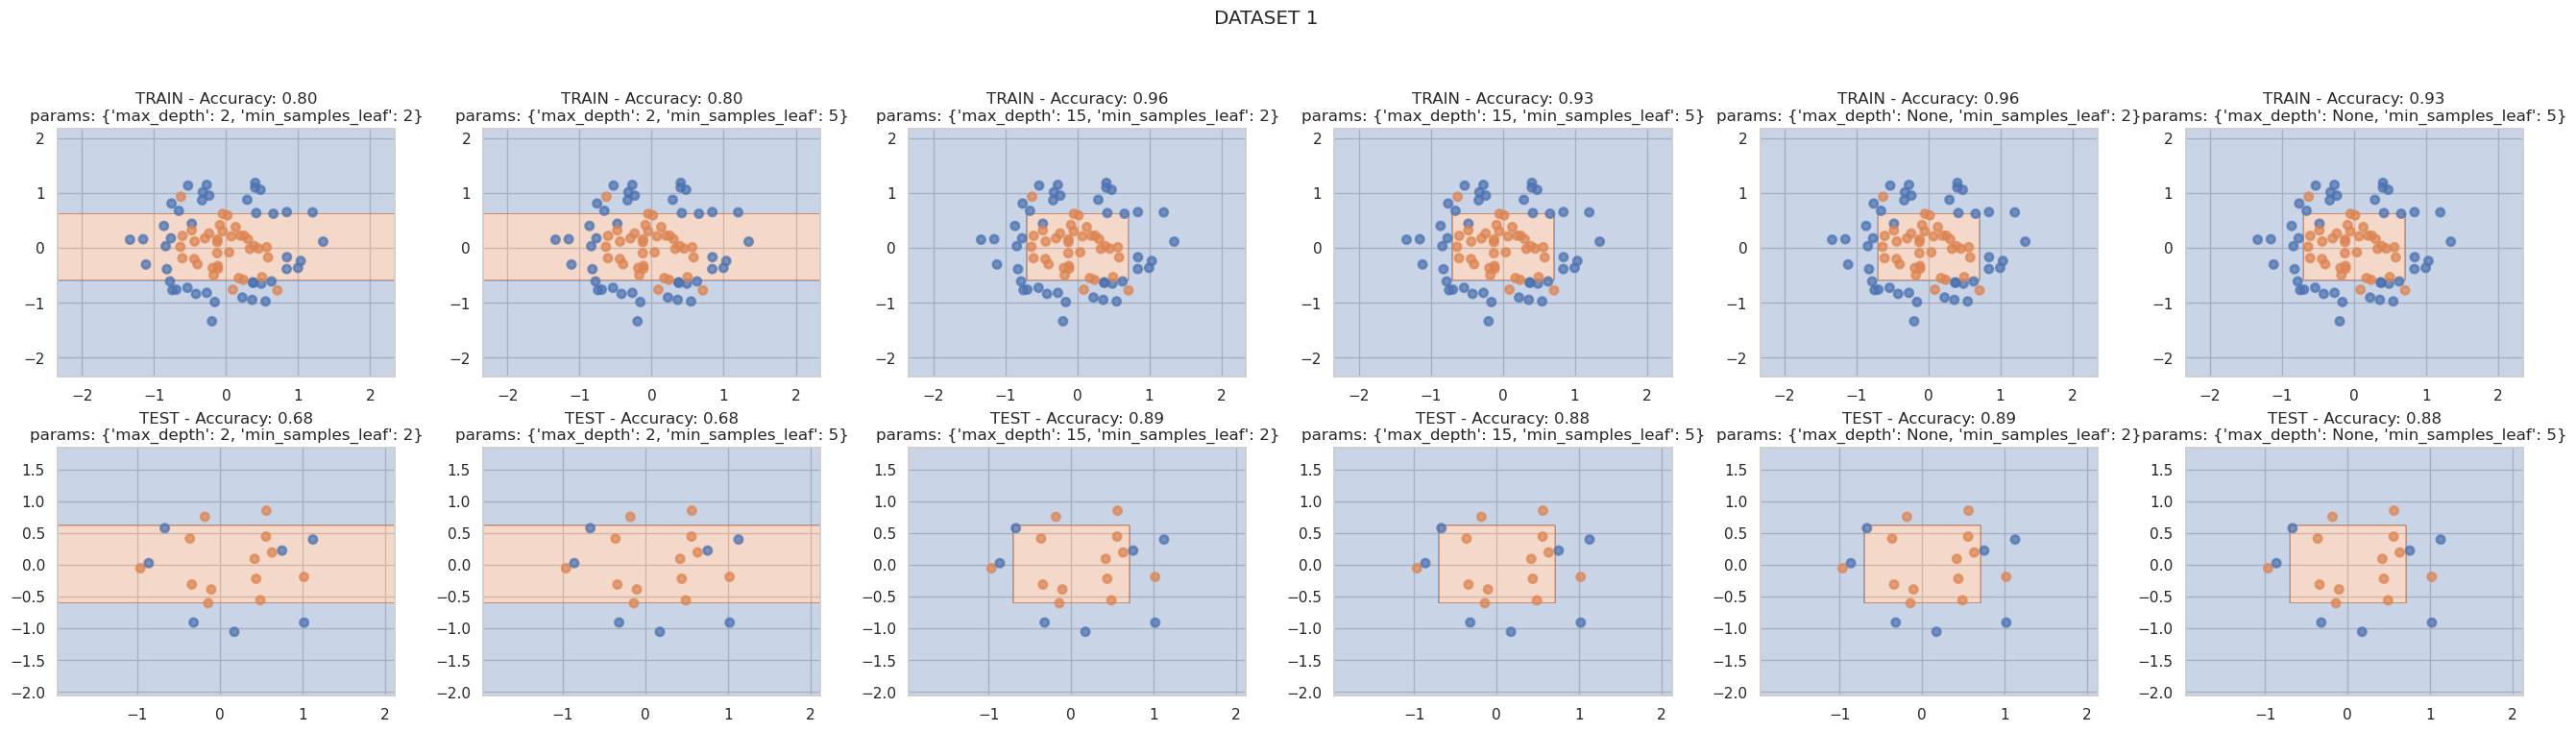

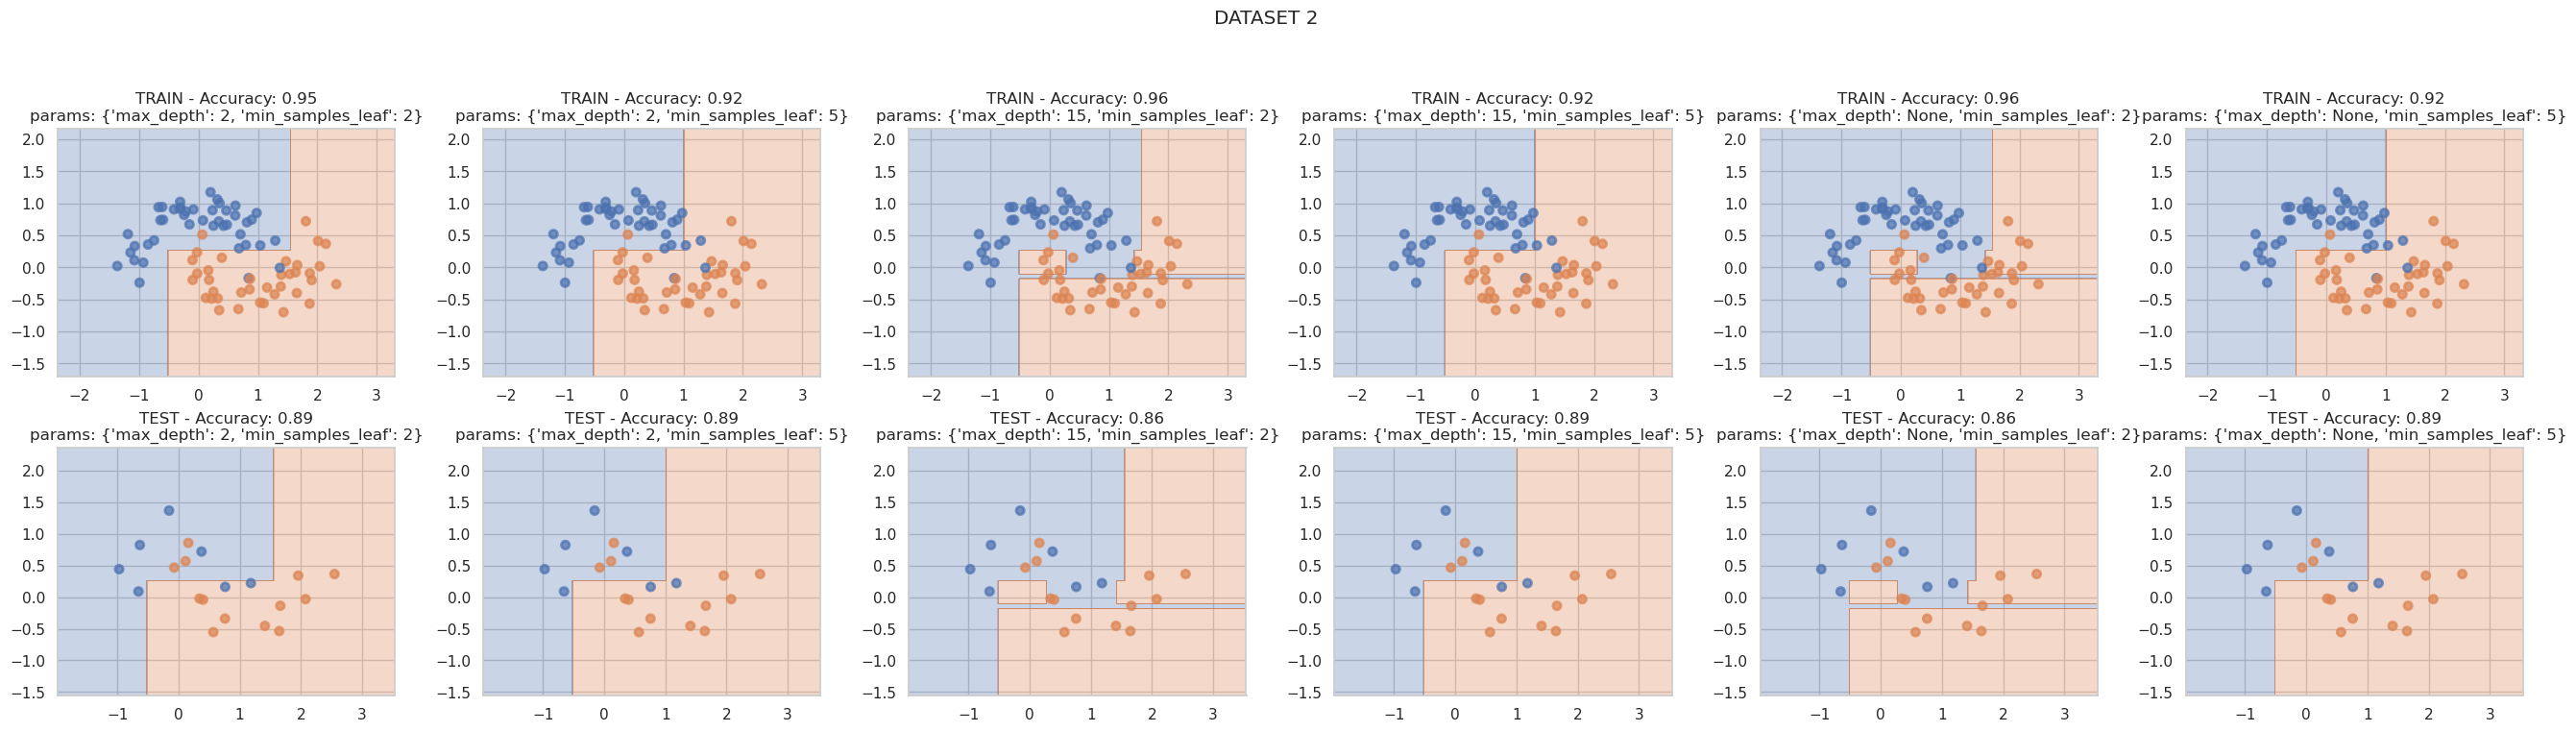

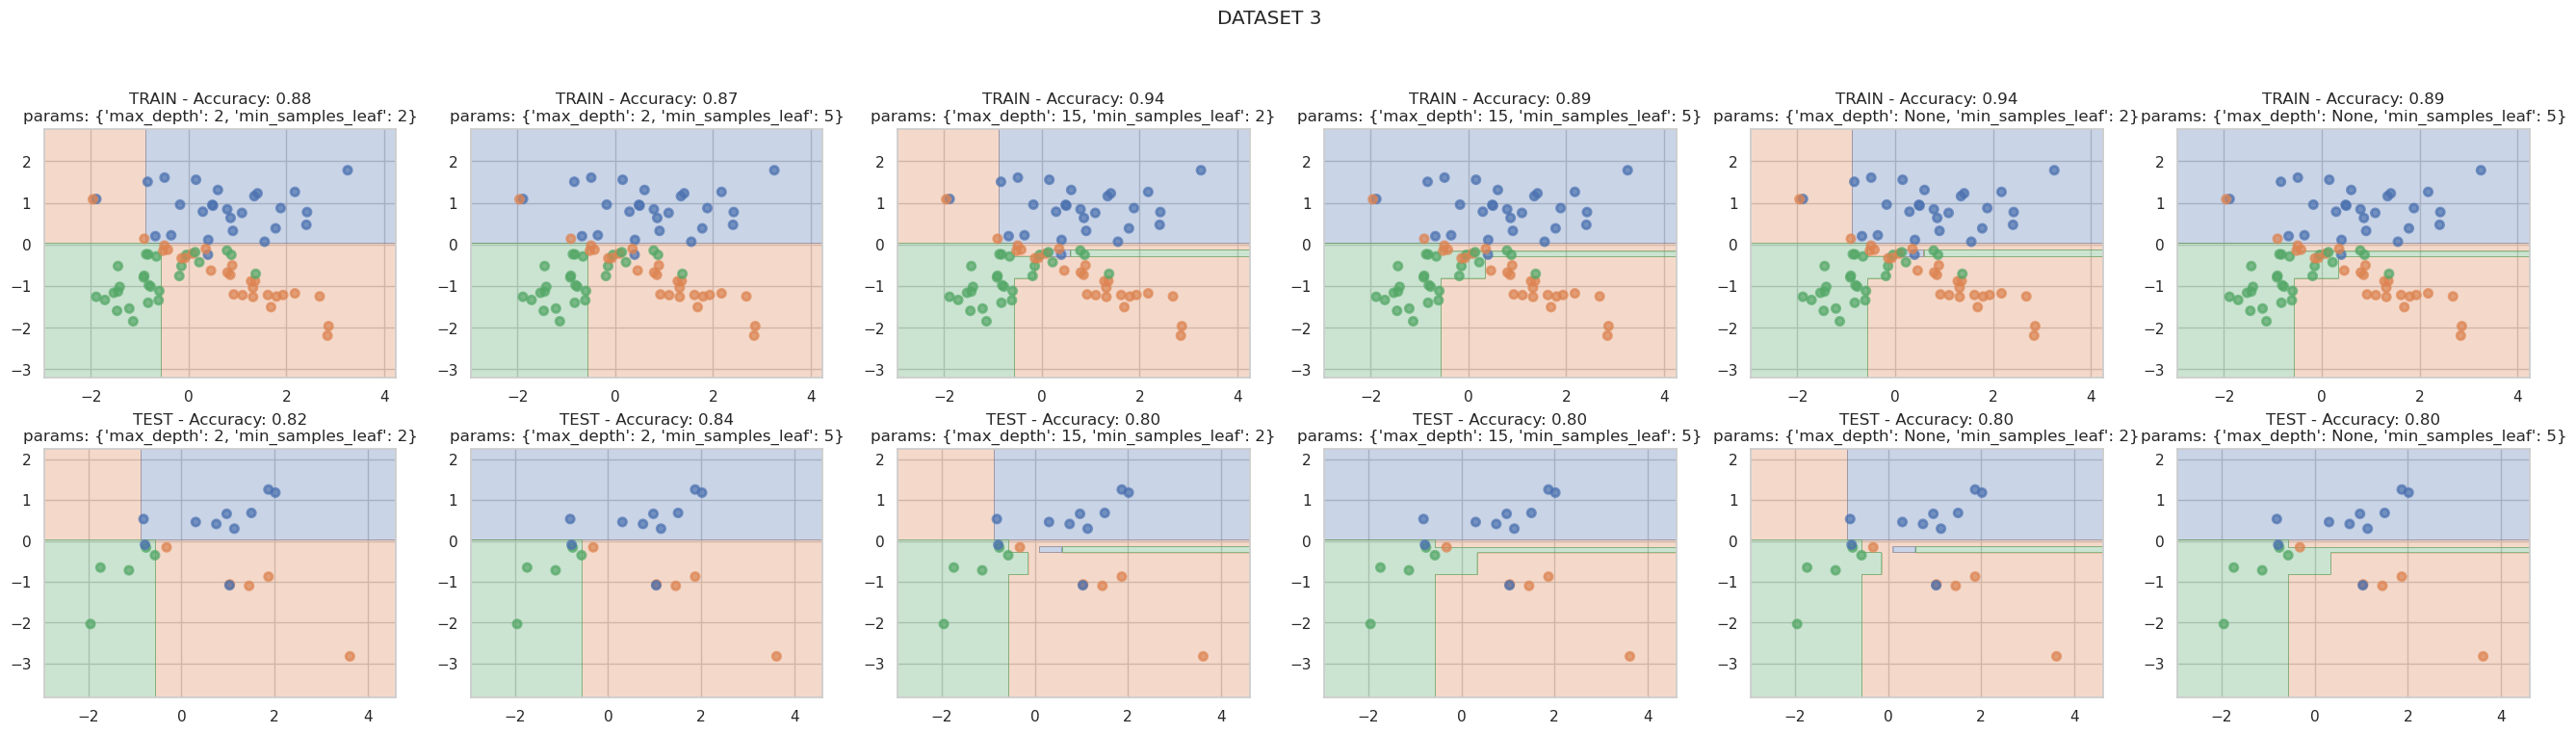

In [8]:
from sklearn.model_selection import GridSearchCV

RANDOM_STATE  =  45

for di, (X, y) in enumerate(datasets, start=1):
    var= f' DATASET_{di} '
    print(f"{var:=^80}")
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    # Grid Search
    clf = DecisionTreeClassifier(random_state=45)

    param_grid = {
        'max_depth': [2, 15, None],
        'min_samples_leaf': [2, 5]
    }
    n_estimators  =  np.product([len(i) for i in param_grid.values()])
    print(f"Number of estimators:  {n_estimators}")
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                            cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)

    grid_search.fit(X_train, y_train)

    # Metrics
    print("Best parameters found: ", grid_search.best_params_)

    acc_tr = grid_search.best_estimator_.score(X_train, y_train)
    acc_tst= grid_search.best_estimator_.score(X_test, y_test)
    print(f"BEST Accuracy:  Train:  {acc_tr:.2f}   -   Test:  {acc_tst:.2f}")

    # extract experiments res
    gs_res = pd.DataFrame.from_dict(grid_search.cv_results_)

    plt.figure(figsize=(27, 8))
    plt.suptitle(f'DATASET {di}')
    # reassamble models
    for idx, row in gs_res.iterrows():
        params = row['params']
        mean_train_score = row['mean_train_score']
        mean_test_score  = row['mean_test_score']
        # idx+=1
        
        iclf = DecisionTreeClassifier(random_state=RANDOM_STATE, **params)
        iclf.fit(X_train, y_train)
        
        # plot train
        plt.subplot(2, n_estimators, idx+1)
        plot_surface(iclf, X_train, y_train)
        plt.title(f"TRAIN - Accuracy: {mean_train_score:.2f}\nparams: {params}")
        
        # plot test
        plt.subplot(2, n_estimators, idx+1+6)
        plot_surface(iclf, X_test, y_test)
        plt.title(f"TEST - Accuracy: {mean_test_score:.2f}\nparams: {params}")
        
    plt.tight_layout(h_pad=0.5, w_pad=2.5, pad=2.5)

__Ответ:__

Заметно, что даже небольшой тюнинг гиперпараметров дерева позволяет существенно повысить обобщающуу способность дерева.

GridSearchCV позволяет удобно перебрать все параметры и выбрать наиболее оптимальные.

Особенно заметно, как более глубокие деревья или деревья с малым количеством min_samples_leaf переобучаются под выбросы.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [9]:
from tree_code import find_best_split

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [10]:
import pandas as pd
stud = pd.read_csv('students.csv')
stud.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


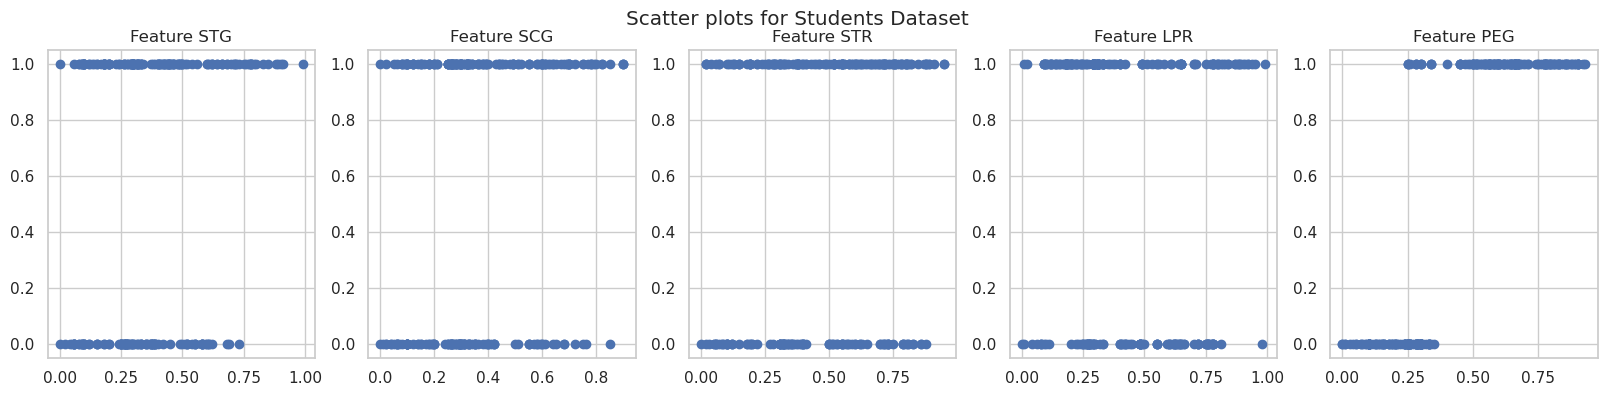

In [44]:
N_PLOTS = len(stud.columns[:-1])
plt.figure(figsize=(N_PLOTS*4, 4))
plt.suptitle(f'Scatter plots for Students Dataset')
for i in range(N_PLOTS):
    plt.subplot(1, N_PLOTS, i+1)
    plt.scatter(x=stud.iloc[:, i], y=stud.iloc[:, -1])
    plt.title(f"Feature {stud.columns[i]}")

Интуитивно кажется, что признак PEG должен стать лучшим для первичного разбиения при построении дерева, так как в окрестности 0.33 практически идеально отделяет 2 класса друг от друга

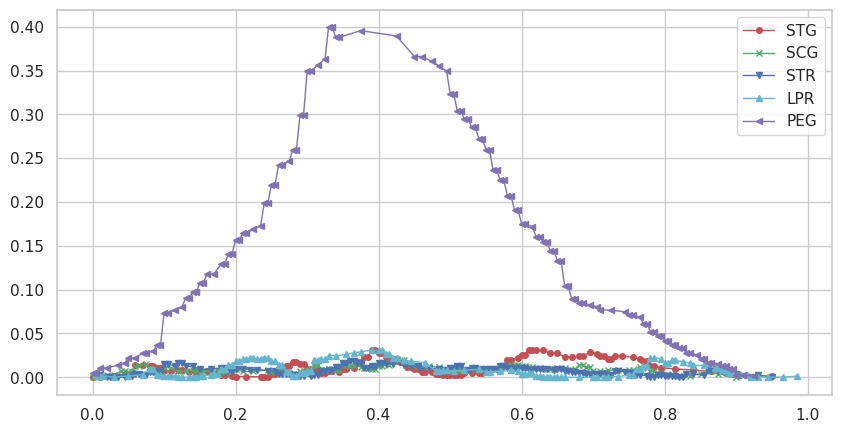

In [47]:
# test custom custom split finder...
# split_data = {}
plt.figure(figsize=(10, 5))
markers  = ['o', 'x', 'v', '^', '<', '>', 'd']
colors = ['r',  'g',  'b', 'c', 'm',  'y',  'k']
for i, ft in enumerate(stud.columns[:-1]):
    unique_thresholds, ginis, _, _ = find_best_split(feature_vector=stud.iloc[:, i].values, 
                                                     target_vector=stud.iloc[:, -1].values)
    # split_data[ft]  =  {
    #     'ginis':  ginis,
    #     'thresholds':  unique_thresholds
    # }

    plt.plot(unique_thresholds, ginis, 
                marker=markers[i], linewidth=1, 
                markersize=4,  color=colors[i], label=ft)
plt.legend()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:**

Подтверждается вырвавшийся вывод по поводу того, что признак "PEG" лучше всего подходит для первичного разбиения, так как при нем действительно достигается наибольшая gini impurity при threshold около 0.33

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




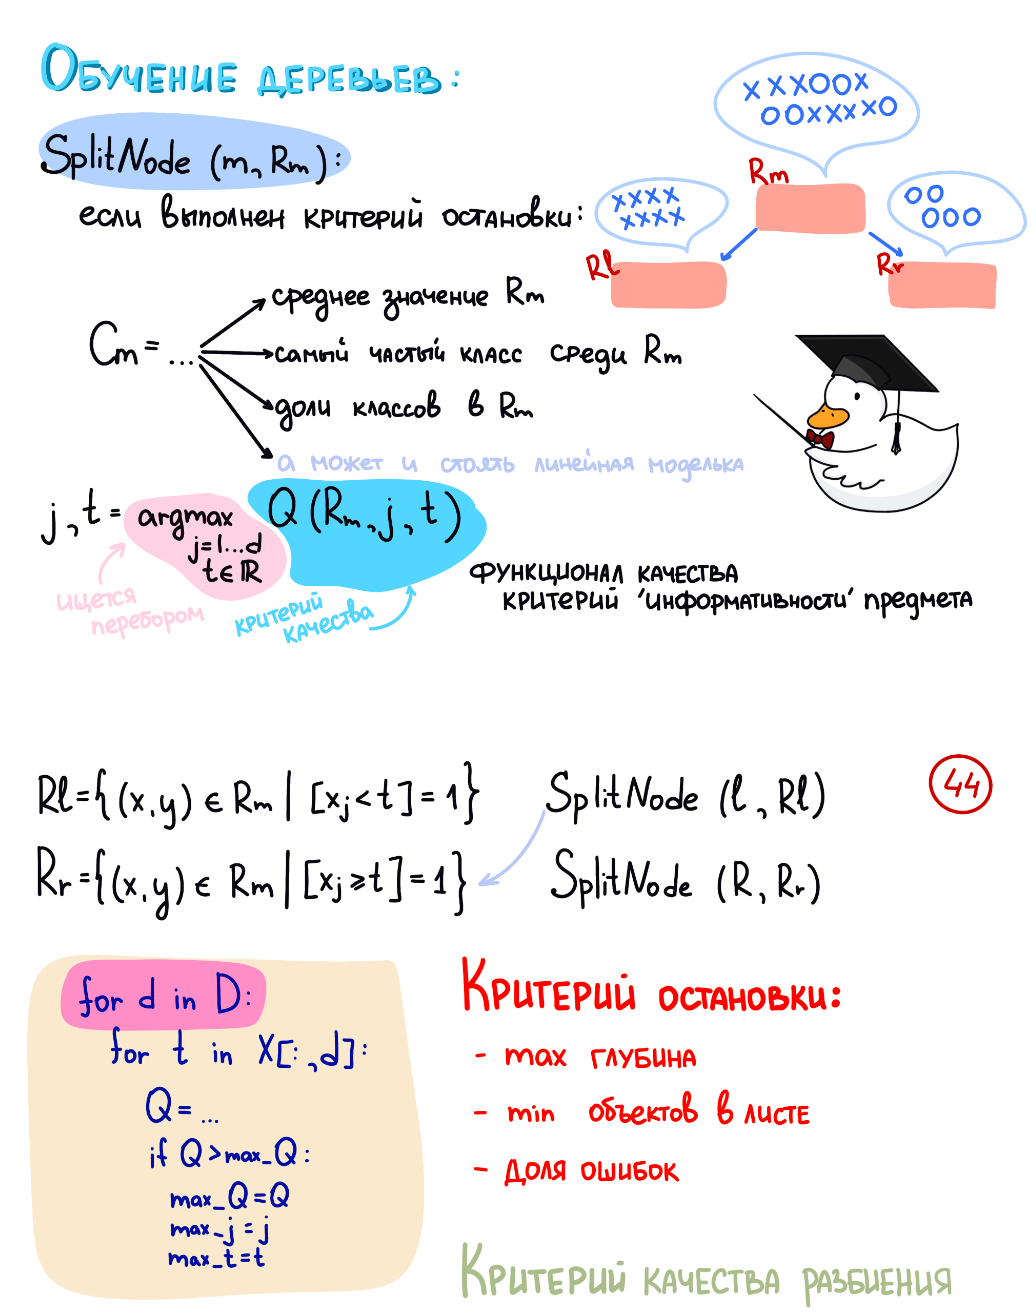

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [171]:
from tree_code import DecisionTree
from smpl import DecisionTree as smplTree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


with open('agaricus-lepiota.data', 'r') as f:
    shrooms = f.readlines()
    shrooms = np.array([row.replace('\n',  '').replace('?','UNKNOWN').split(',') for row in shrooms])

shroomFormer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), list(range(shrooms.shape[1])))
        ],
    remainder='passthrough'
)

shroomed = shroomFormer.fit_transform(shrooms)

X_train, X_test, y_train, y_test  = train_test_split(shroomed[:, 1:], shroomed[:, 0], test_size=0.5, random_state=46, stratify=shroomed[:, 0])

cust_tree = DecisionTree(feature_types=['categorical']*X_train.shape[1],
                         max_depth=10, min_samples_leaf=2, min_samples_split=6)

cust_tree.fit(X_train, y_train)

tr_pred = cust_tree.predict(X_train)
tst_pred = cust_tree.predict(X_test)

tr_acc  = accuracy_score(y_true=y_train, y_pred=tr_pred)
tst_acc= accuracy_score(y_true=y_test, y_pred=tst_pred)

print(f"TRAIN ACCURACY:  {tr_acc:.2f}")
print(f"TEST ACCURACY:  {tst_acc:.2f}")

TRAIN ACCURACY:  1.00
TEST ACCURACY:  1.00


In [172]:
cust_tree._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [0.0, 3.0, 5.0],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [3.0, 2.0, 0.0, 8.0, 6.0, 1.0, 4.0, 7.0],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [2.0, 3.0, 5.0, 6.0, 7.0, 4.0],
   'left_child': {'type': 'nonterminal',
    'feature_split': 1,
    'categories_split': [2.0, 0.0, 3.0],
    'left_child': {'type': 'nonterminal',
     'feature_split': 14,
     'categories_split': [2.0, 3.0, 5.0, 6.0, 7.0],
     'left_child': {'type': 'nonterminal',
      'feature_split': 21,
      'categories_split': [1.0, 6.0, 4.0, 0.0, 5.0, 3.0],
      'left_child': {'type': 'terminal', 'class': 0.0},
      'right_child': {'type': 'nonterminal',
       'feature_split': 8,
       'categories_split': [11.0, 5.0, 6.0],
       'left_child': {'type': 'terminal', 'class': 0.0},
       'right_child': {'type': 'terminal', 'class': 1.0}}},
     'right_child': {'type':

In [167]:
cust_tree._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [0.0, 3.0, 5.0],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [3.0, 2.0, 0.0, 8.0, 6.0, 1.0, 4.0, 7.0],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [2.0, 3.0, 5.0, 6.0, 7.0, 4.0],
   'left_child': {'type': 'nonterminal',
    'feature_split': 1,
    'categories_split': [2.0, 0.0, 3.0],
    'left_child': {'type': 'nonterminal',
     'feature_split': 14,
     'categories_split': [2.0, 3.0, 5.0, 6.0, 7.0],
     'left_child': {'type': 'nonterminal',
      'feature_split': 21,
      'categories_split': [1.0, 6.0, 4.0, 0.0, 5.0, 3.0],
      'left_child': {'type': 'terminal', 'class': 0.0},
      'right_child': {'type': 'nonterminal',
       'feature_split': 1,
       'categories_split': [2.0],
       'left_child': {'type': 'terminal', 'class': 0.0},
       'right_child': {'type': 'terminal', 'class': 1.0}}},
     'right_child': {'type': 'nontermin

In [144]:
np.unique(tr_pred), np.unique(tst_pred)

(array([0.]), array([0.]))

In [127]:
tst_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
y_train

array([1., 0., 1., ..., 1., 0., 1.])

In [151]:
from tree_code import find_best_split as my_best_split
from smpl import find_best_split as alien_split

feature_vector = X_train[:, 0]
target_vector = y_train

print(my_best_split(feature_vector, target_vector))
print(alien_split(feature_vector, target_vector))

(array([0.5, 1.5, 2.5, 3.5, 4.5]), array([0.01360251, 0.01311147, 0.00111857, 0.00091862, 0.00055625]), 0.5, 0.4857515458602104)
(array([0.5, 1.5, 2.5, 3.5, 4.5]), array([0.48575155, 0.48624258, 0.49823549, 0.49843543, 0.4987978 ]), 0.5, 0.4857515458602104)


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ